# Visualizing Earnings Based On College Majors

## Background

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.

## Problem Statement

Using visualizations, we can start to explore questions from the dataset like:

- Do students in more popular majors make more money?
    - Using scatter plots
- How many majors are predominantly male? Predominantly female?
    - Using histograms
- Which category of majors have the most students?
    - Using bar plots

## Data Exploration

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])
print(recent_grads.tail())

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                  2339.0
Men                                    2057.0
Women                                   282.0
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                    0.018381
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
     Rank  

In [14]:
recent_grads.describe(include='all')

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173,172.000000,172.000000,172.000000,173,172.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
unique,NaN,NaN,173,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,PETROLEUM ENGINEERING,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.000000,3879.815029,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,356.080925,31192.763006,...,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,618.361022,50675.002241,...,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.000000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,39.000000,3608.000000,...,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,130.000000,11797.000000,...,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,338.000000,31433.000000,...,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000


There are some missing values but seems very minimum so we will drop those rows and compare # of rows dropped to confirm.

In [15]:
raw_data_count = len(recent_grads)
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads)

In [16]:
print(raw_data_count)
print(cleaned_data_count)

173
172


Only one row contained missing values and was dropped.

### Pandas, Scatter Plots

<AxesSubplot:xlabel='Sample_size', ylabel='Median'>

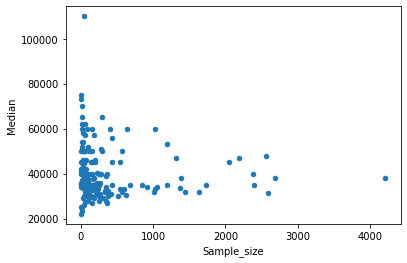

In [17]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

<AxesSubplot:xlabel='Sample_size', ylabel='Unemployment_rate'>

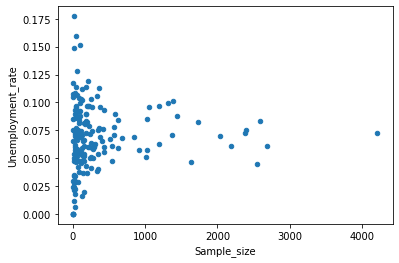

In [18]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

<AxesSubplot:xlabel='Full_time', ylabel='Median'>

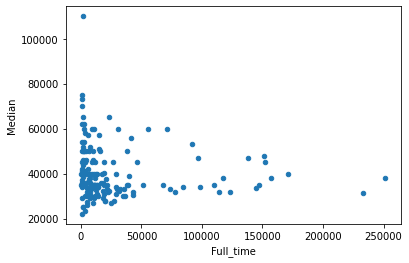

In [19]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

<AxesSubplot:xlabel='ShareWomen', ylabel='Unemployment_rate'>

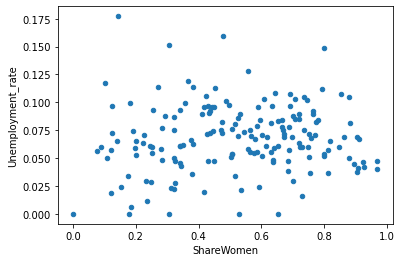

In [21]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

<AxesSubplot:xlabel='Men', ylabel='Median'>

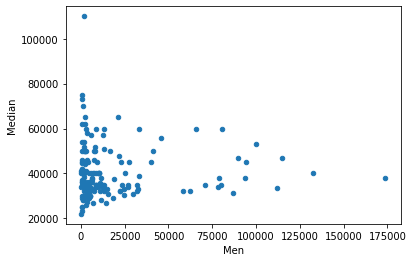

In [22]:
recent_grads.plot(x='Men', y='Median', kind='scatter')

<AxesSubplot:xlabel='Women', ylabel='Median'>

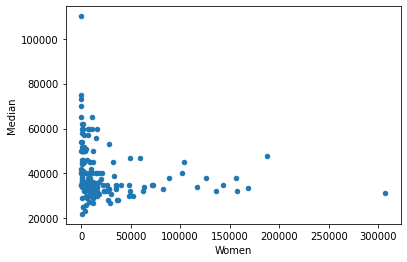

In [23]:
recent_grads.plot(x='Women', y='Median', kind='scatter')

<AxesSubplot:xlabel='ShareWomen', ylabel='Median'>

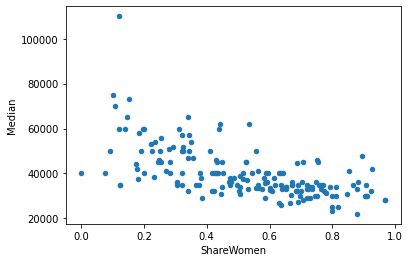

In [24]:
recent_grads.plot(x='ShareWomen', y='Median', kind='scatter')

- Do students in more popular majors make more money?
    - Popular majors with more graduates in the male & female populations show that they make less money.
- Do students that majored in subjects that were majority female make more money?
    - Grduates from majors with majority of women tend to make less money.
- Is there any link between the number of full-time employees and median salary?
    - High median salary can only be seen among for a major that has a smaller number of full-time employees

### Pandas, Histograms

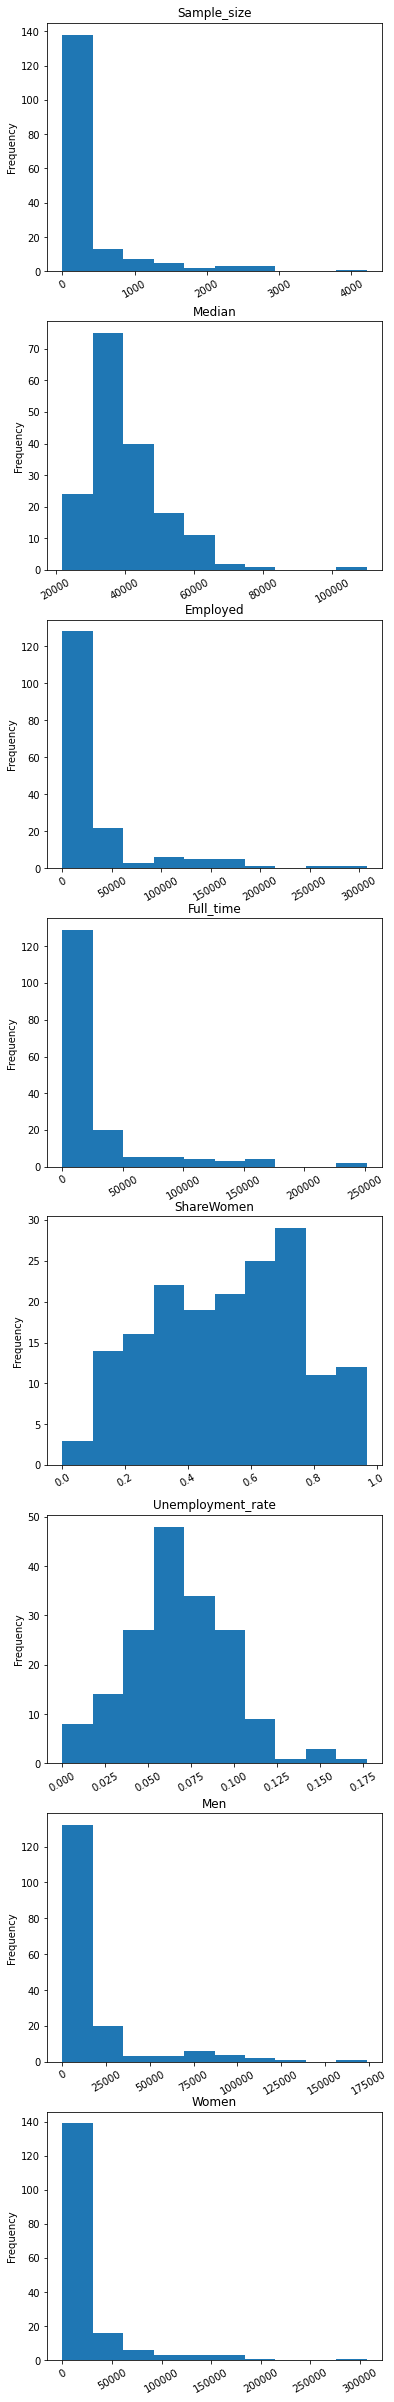

In [40]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", 
        "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(6,43))
for r in range(0,8):
    ax = fig.add_subplot(8,1,r+1)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=30, title=cols[r])

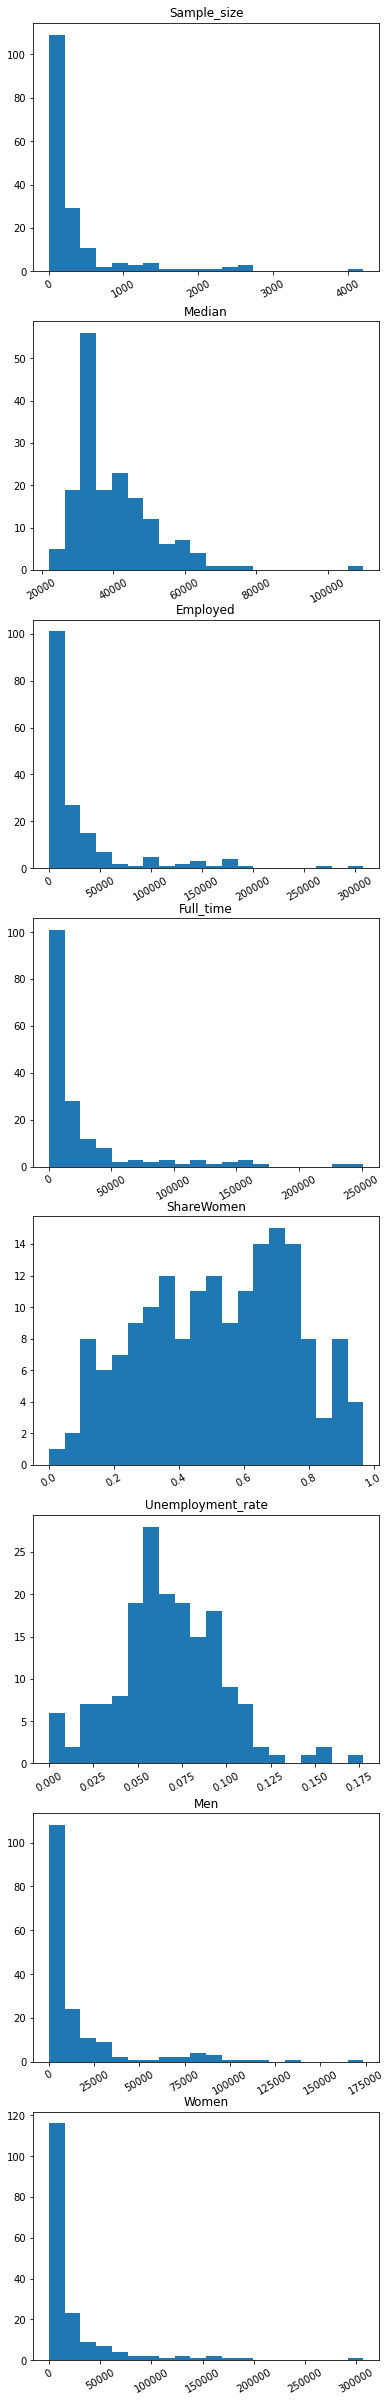

In [49]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", 
        "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(6.2,43))
for r in range(0,8):
    ax = fig.add_subplot(8,1,r+1)
    ax = recent_grads[cols[r]].hist(bins=20, xrot=30, grid=False)
    ax.set_title(cols[r])

In [82]:
most_female = recent_grads[recent_grads['ShareWomen']>=0.5]['ShareWomen'].count()
most_male = recent_grads[recent_grads['ShareWomen']<0.5]['ShareWomen'].count()

print('# Majors Mostly Female: {} ({:2f})\n# Majors Mostly Male: {} ({:2f})'.format(
                most_female, most_female/len(recent_grads),
                most_male, most_male/len(recent_grads)))

# Majors Mostly Female: 96 (0.558140)
# Majors Mostly Male: 76 (0.441860)


- What percent of majors are predominantly male? Predominantly female?
    - 56% of majors are predominantly male, and 44% are predominantly female
- What's the most common median salary range?
    - \\$30,000 to \\$35,000

### Pandas, Scatter Matrix Plot

In the last 2 steps, we created individual scatter plots to visualize potential relationships between columns and histograms to visualize the distributions of individual columns. A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously. 

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>]], dtype=object)

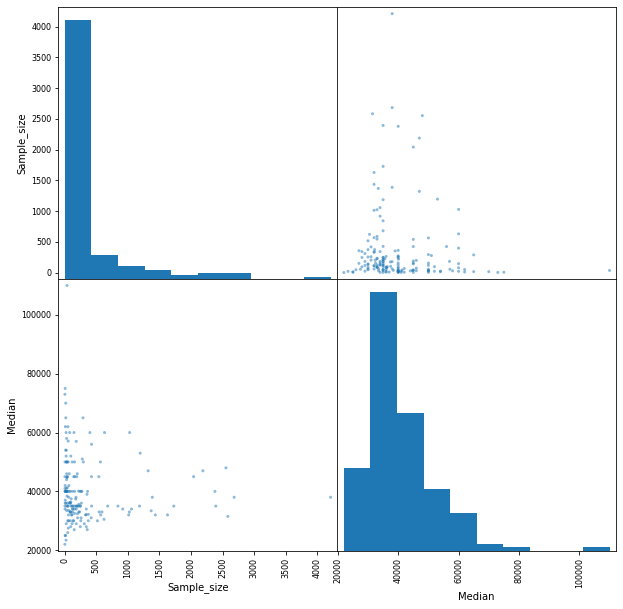

In [84]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Median'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Unemployment_rate'>]],
      dtype=object)

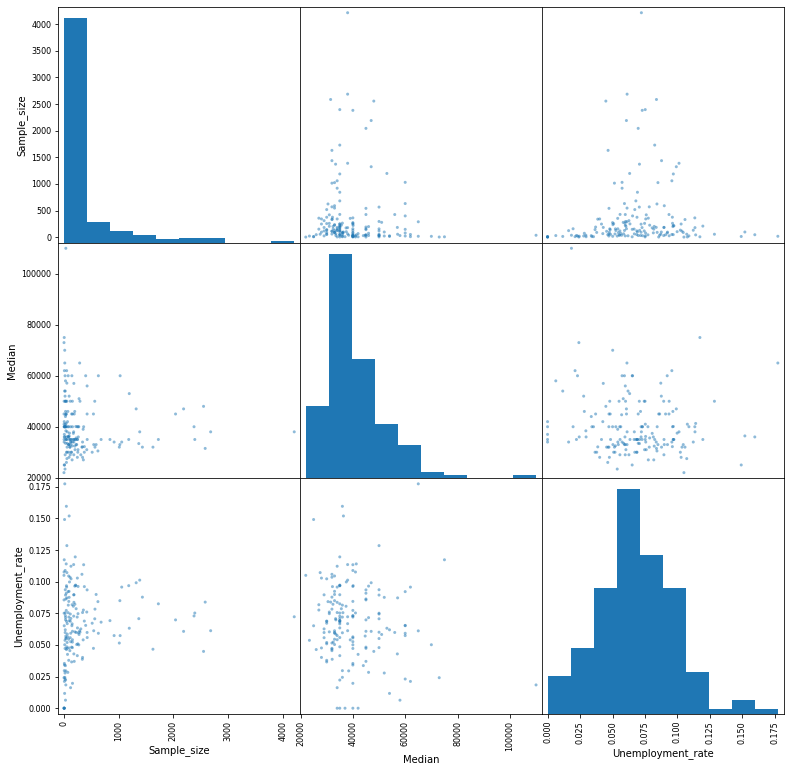

In [86]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 
                             'Unemployment_rate']], figsize=(13,13))

## Pandas, Bar Plots

<AxesSubplot:xlabel='Major'>

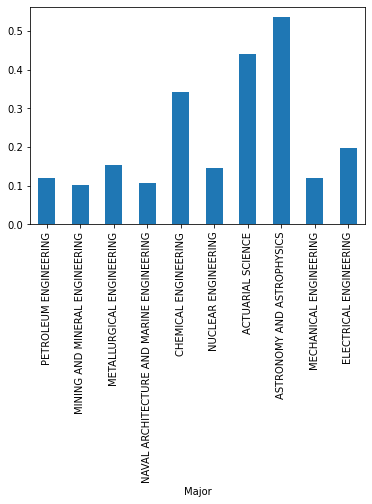

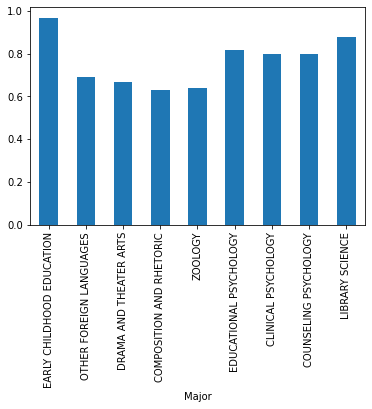

In [87]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)

<AxesSubplot:xlabel='Major'>

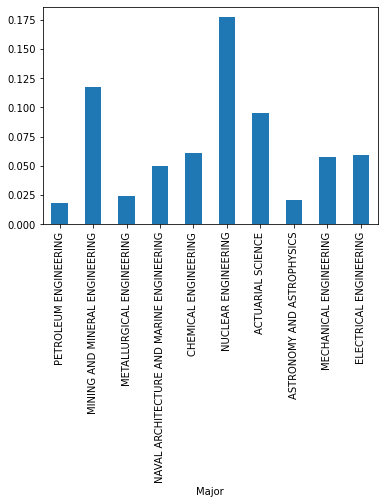

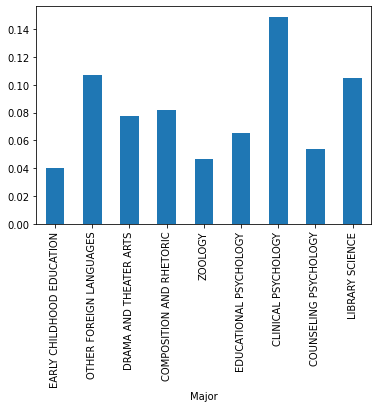

In [88]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
recent_grads[163:].plot.bar(x='Major', y='Unemployment_rate', legend=False)

## Next Steps:

- Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
- Use a box plot to explore the distributions of median salaries and unemployment rate.
- Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.